<a href="https://colab.research.google.com/github/mannat244/ML_Lab/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Least Squares vs Ridge Regression

## Objective
To compare Ordinary Least Squares (LSE) and Ridge Regression using matrix formulation and visualize their differences.

---

## Model

We assume a linear model:

\[
\hat{y} = a + bx
\]

In matrix form:

\[
\hat{y} = X\theta
\]

Where:

\[
\theta =
\begin{bmatrix}
a \\
b
\end{bmatrix}
\]

---

## Ordinary Least Squares

The closed-form solution is:

\[
\theta = (X^T X)^{-1} X^T y
\]

This minimizes the squared error:

\[
E = \sum (y_i - \hat{y}_i)^2
\]

---

## Ridge Regression

Ridge adds L2 regularization:

\[
E = \sum (y_i - \hat{y}_i)^2 + c ||\theta||^2
\]

Closed-form solution:

\[
\theta = (X^T X + cI)^{-1} X^T y
\]

Where:
- \(c\) is the regularization parameter
- \(I\) is the identity matrix

---

## Observations

- For small \(c\), Ridge behaves like LSE.
- As \(c\) increases, coefficients shrink.
- Ridge reduces overfitting.
- RMSE slightly increases as regularization increases.


LSE Solution
a = -4.749999999999995 b = 4.15
RMSE = 2.5729360660537224

Ridge (c = 3.814697265625e-06)
a = -4.749983072335419 b = 4.149997339256982
RMSE = 2.572936066067279

Ridge (c = 7.62939453125e-06)
a = -4.749966144779943 b = 4.149994678530618
RMSE = 2.572936066107955

Ridge (c = 1.52587890625e-05)
a = -4.749932289996217 b = 4.149989357127836
RMSE = 2.5729360662706506

Ridge (c = 3.0517578125e-05)
a = -4.749864581737702 b = 4.149978714522077
RMSE = 2.572936066921415


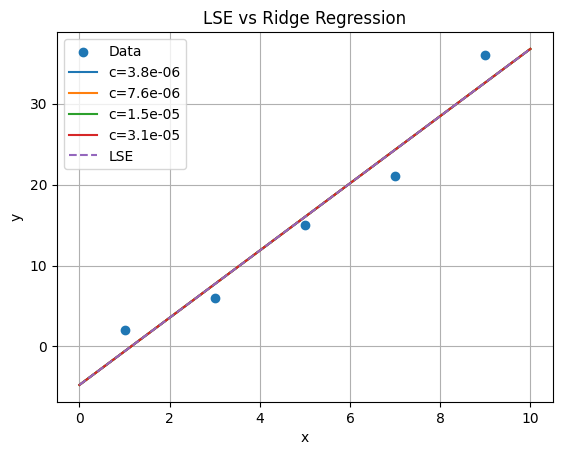

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1, 3, 5, 7, 9], dtype=float)
y = np.array([2, 6, 15, 21, 36], dtype=float)

# Design matrix
X = np.column_stack((np.ones(len(x)), x))

# ===== Ordinary Least Squares =====
theta_lse = np.linalg.inv(X.T @ X) @ X.T @ y
a_lse, b_lse = theta_lse

y_pred_lse = X @ theta_lse
rmse_lse = np.sqrt(np.mean((y - y_pred_lse) ** 2))

print("LSE Solution")
print("a =", a_lse, "b =", b_lse)
print("RMSE =", rmse_lse)

# ===== Ridge Regression =====
c_values = [2**-18, 2**-17, 2**-16, 2**-15]

plt.scatter(x, y, label="Data")

x_plot = np.linspace(0, 10, 100)

for c in c_values:
    theta_ridge = np.linalg.inv(X.T @ X + c * np.eye(2)) @ X.T @ y
    a_r, b_r = theta_ridge

    y_plot = a_r + b_r * x_plot
    y_pred = X @ theta_ridge
    rmse = np.sqrt(np.mean((y - y_pred) ** 2))

    print(f"\nRidge (c = {c})")
    print("a =", a_r, "b =", b_r)
    print("RMSE =", rmse)

    plt.plot(x_plot, y_plot, label=f"c={c:.1e}")

# LSE line
plt.plot(x_plot, a_lse + b_lse * x_plot, '--', label="LSE")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("LSE vs Ridge Regression")
plt.grid(True)
plt.show()


In [4]:
# Scale x to [-1, 1]
x_scaled = (x - np.mean(x)) / np.std(x)

degree = 9
lambdas = [0, 0.001, 0.1, 10, 1000]

X = polynomial_design_matrix(x_scaled, degree)

x_plot = np.linspace(min(x_scaled), max(x_scaled), 500)
X_plot = polynomial_design_matrix(x_plot, degree)


λ = 0
RMSE = 0.871625
Coefficient magnitude = 0.0352
---------------
λ = 1e-06
RMSE = 0.871625
Coefficient magnitude = 0.0352
---------------
λ = 0.01
RMSE = 0.871625
Coefficient magnitude = 0.0352
---------------
λ = 1
RMSE = 0.871625
Coefficient magnitude = 0.0352
---------------
λ = 100
RMSE = 0.8717
Coefficient magnitude = 0.035
---------------


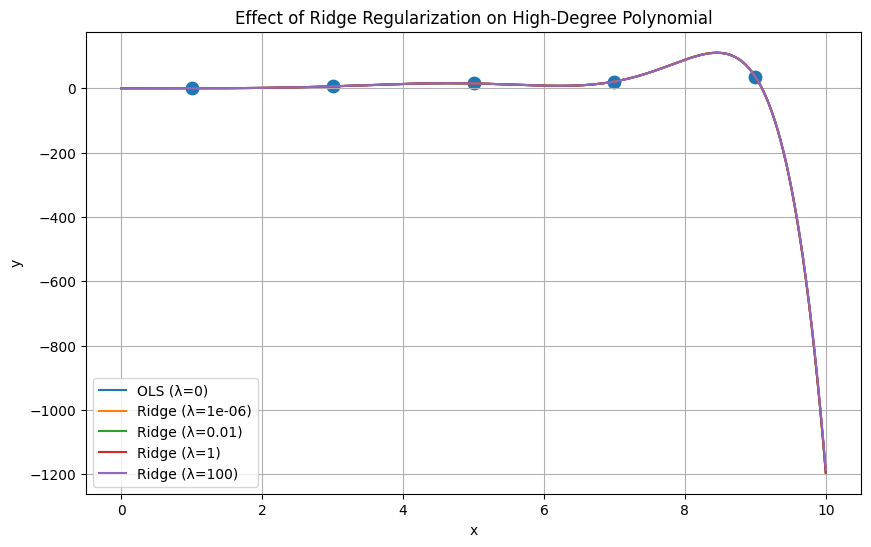

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Data
# -----------------------------
x = np.array([1, 3, 5, 7, 9], dtype=float)
y = np.array([2, 6, 15, 21, 36], dtype=float)

# -----------------------------
# Helper Functions
# -----------------------------
def polynomial_design_matrix(x, degree):
    return np.vstack([x**i for i in range(degree + 1)]).T

def ridge_regression(X, y, c):
    I = np.eye(X.shape[1])
    return np.linalg.pinv(X.T @ X + c * I) @ X.T @ y

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


# -----------------------------
# Settings
# -----------------------------
degree = 9  # intentionally high to show overfitting
lambdas = [0, 1e-6, 1e-2, 1, 100]

X = polynomial_design_matrix(x, degree)

x_plot = np.linspace(0, 10, 500)
X_plot = polynomial_design_matrix(x_plot, degree)

plt.figure(figsize=(10,6))
plt.scatter(x, y, s=80)

for lam in lambdas:
    if lam == 0:
        w = np.linalg.pinv(X.T @ X) @ X.T @ y
        label = "OLS (λ=0)"
    else:
        w = ridge_regression(X, y, lam)
        label = f"Ridge (λ={lam})"

    y_plot = X_plot @ w
    y_train = X @ w

    print(f"λ = {lam}")
    print("RMSE =", round(rmse(y, y_train), 6))
    print("Coefficient magnitude =", round(np.linalg.norm(w), 4))
    print("---------------")

    plt.plot(x_plot, y_plot, label=label)

plt.title("Effect of Ridge Regularization on High-Degree Polynomial")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
